# **Project Buisness Statistics: E-News Express**

## **Defining the Problem Statement and Objectives**

The introduction of electronic news portals, or e-news, has drastically changed the way people around the world access information. E-news Express, an online news platform, seeks to increase subscribers by analyzing visitor actions for improved engagement. Concerns about a decline in monthly subscriptions prompt the company to redesign its webpage, citing issues with the current layout and content. Thanks to the use of A/B testing, we can assess the effectiveness of the new design by comparing user responses to the existing and updated landing pages.

The company's design team developed a new landing page with better features, aiming to attract more subscribers. The Data Science team conducted an experiment with 100 users, who were randomly assigned to either the existing landing page (control group) or the new landing page (treatment group). The objective of this project is to analyze the users' interactions to determine the effectiveness of the new landing page versus the old one using a statistical analysis at a significance level of 5%. We need to compare the amount of time users spend on the new and existing page, as well as the conversion rate of users who switch to either pages, the preferred language and other data about different language users.

### **Setting Up**

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv('/content/drive/MyDrive/Data Science & Business Analytics Program/Business Statistics/Project/abtest.csv')

## **Exploring the dataset and extract insights using Exploratory Data Analysis**

### **Data Overview**

#### First and last few rows of the dataset

In [30]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [31]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Shape of the dataset

In [32]:
df.shape

(100, 6)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Statistical summary for the variables

In [34]:
 df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [35]:
df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


#### Checking for any missing or duplicate value

In [36]:
print(df.isnull().sum(),"\n")
print("\033[1mThere is no missing value for any of the variable.\033[0m")

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64 

There is no missing value for any of the variable.


In [37]:
df['group'].duplicated()


0     False
1     False
2      True
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: group, Length: 100, dtype: bool

In [38]:
df['converted'].duplicated()

0     False
1     False
2      True
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: converted, Length: 100, dtype: bool

In [39]:
df['language_preferred'].duplicated()

0     False
1     False
2      True
3     False
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: language_preferred, Length: 100, dtype: bool

In [40]:
df['landing_page'].duplicated()

0     False
1     False
2      True
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: landing_page, Length: 100, dtype: bool

In [41]:
df.columns.duplicated()

array([False, False, False, False, False, False])

While there are duplicated values for each of the rows for each variable, there are none for the columns.

### **Univariate Analysis**




#### Group

In [42]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

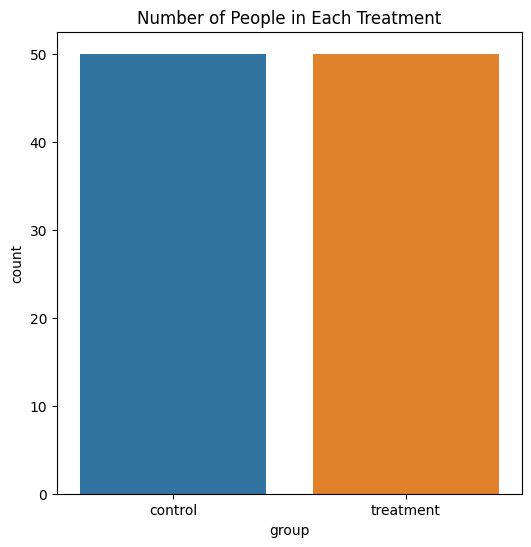

In [43]:
plt.figure(figsize=(6,6))
plt.title("Number of People in Each Treatment")
sns.countplot(data=df,x='group')
plt.show()

#### Landing page


In [44]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

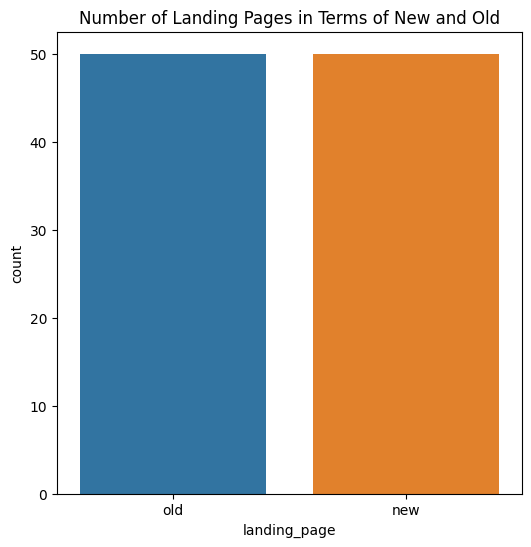

In [45]:
plt.figure(figsize=(6,6))
plt.title("Number of Landing Pages in Terms of New and Old")
sns.countplot(data=df,x='landing_page')
plt.show()

#### Conversion rate

In [46]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

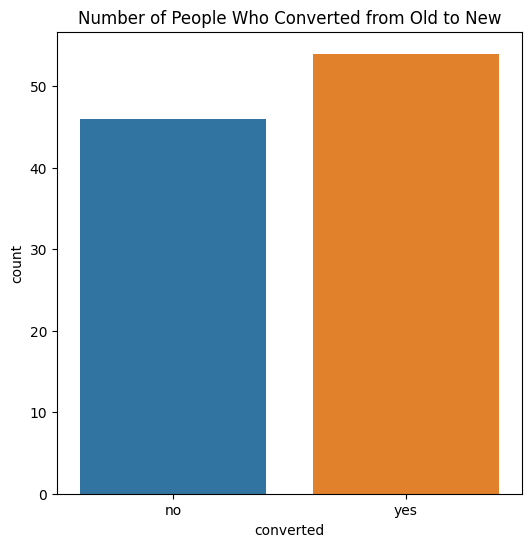

In [47]:
plt.figure(figsize=(6,6))
plt.title("Number of People Who Converted from Old to New")
sns.countplot(data=df,x='converted')
plt.show()

#### Preferred languages

In [48]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

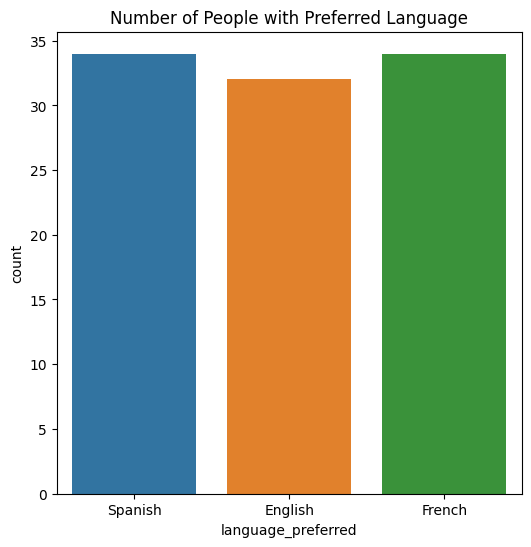

In [49]:
plt.figure(figsize=(6,6))
plt.title("Number of People with Preferred Language")
sns.countplot(data=df,x='language_preferred')
plt.show()

#### Time spent on the page

In [50]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

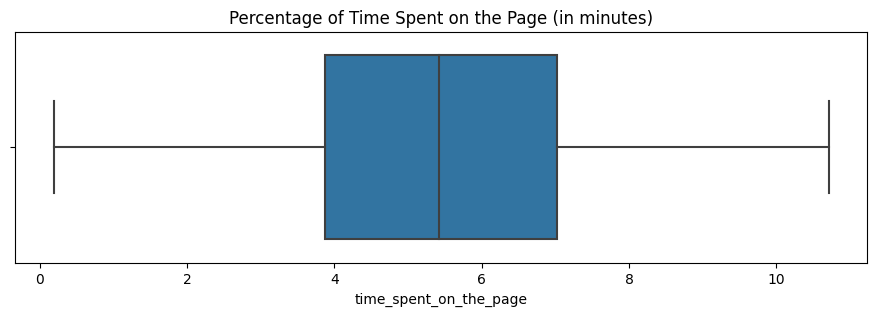

In [51]:
plt.figure(figsize=(11,3))
plt.title("Percentage of Time Spent on the Page (in minutes)")
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show;

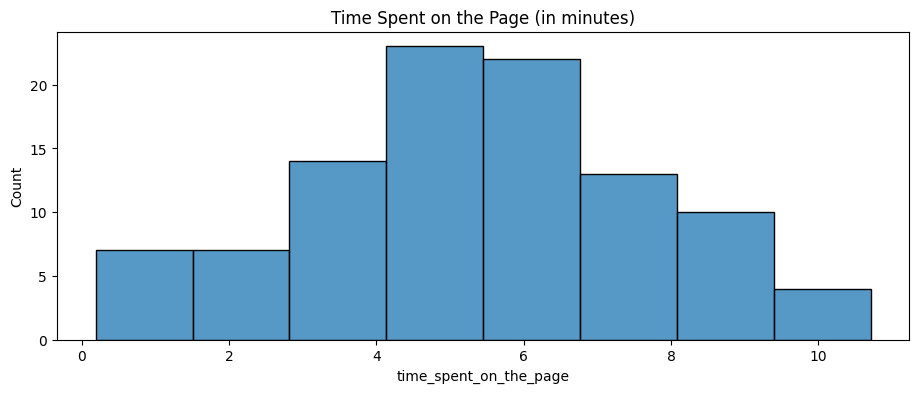

In [52]:
plt.figure(figsize=(11,4))
plt.title("Time Spent on the Page (in minutes)")
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show;

### **Bivariate Analysis**




#### Landing page vs. Time spent on the page

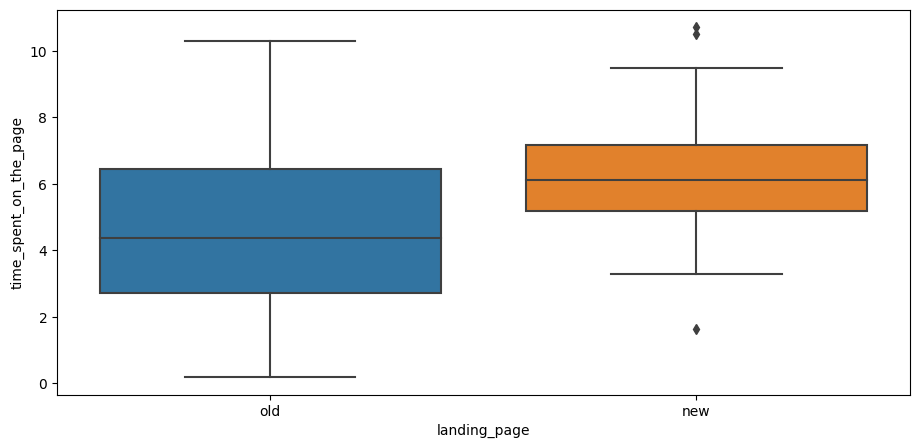

In [53]:
plt.figure(figsize=(11,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

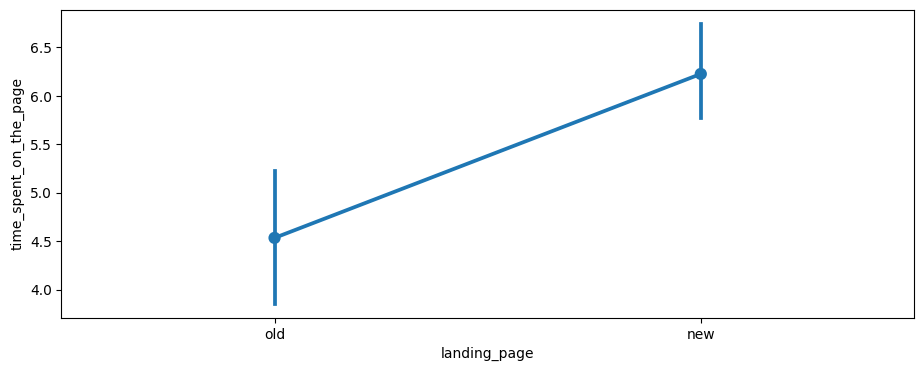

In [54]:
plt.figure(figsize=(11,4))
sns.pointplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

In [55]:
df.groupby(['landing_page'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [56]:
df_mean_page_time = df.groupby(['landing_page'])['time_spent_on_the_page'].mean()
print(df_mean_page_time)

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


On average, users spend more time on the new landing page than the existing landing page.

#### Conversion rate vs. Time spent on the page

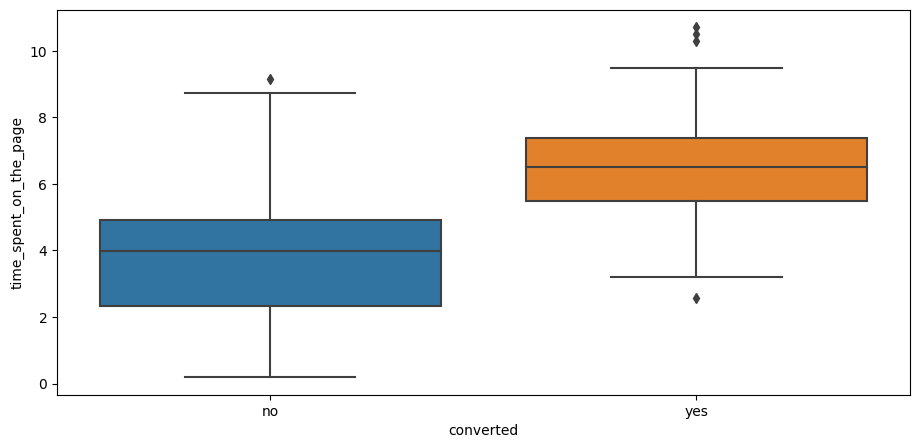

In [57]:
plt.figure(figsize=(11,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

In [58]:
df.groupby(['converted'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
no,46.0,3.915870,2.226897,0.19,2.3375,3.980,4.9225,9.15
yes,54.0,6.623148,1.708427,2.58,5.5000,6.495,7.3675,10.71


There are more users who switch to the new landing page than the existing page.

#### Language preferred vs. Time spent on the page

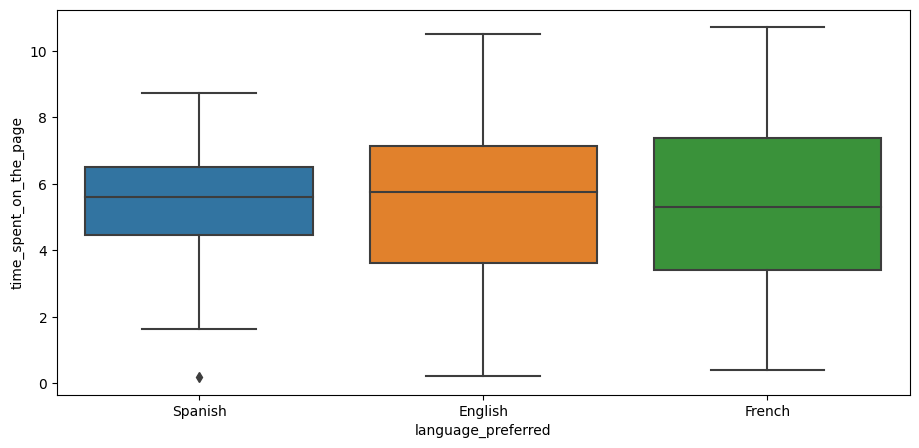

In [59]:
plt.figure(figsize=(11,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()

In [60]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559062,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


On average, there is slightly more time spent on the page by English-speaking users, whereas the least time spent, on average, is by French-speaking users. Interestingly, the preferred Spanish language has the least value of min and max, despite its average being a bit higher than French.

## **1. Do the users spend more time on the new landing page than the existing landing page?**

### **Visual Analysis**

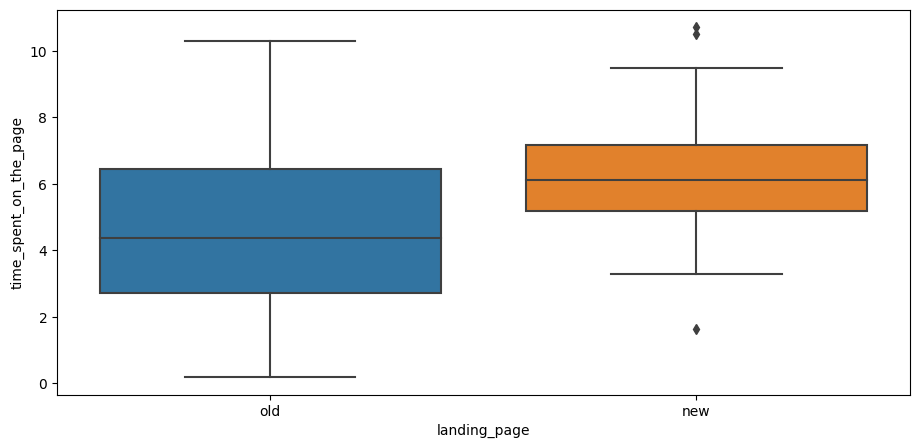

In [61]:
plt.figure(figsize=(11,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

In [62]:
df.groupby(['landing_page'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


### **Defining the Null and Alternate Hypotheses**

$T_E$: time spent on existing/old landing page

$T_N$: time spent on new landing page

$H_0$: $T_N$ $=$ $T_E$

$H_a$: $T_N$ $>$ $T_E$

### **Selecting the Appropriate Test and Significance Level**

Because this is a one-tailed test with two population means from two independent populations with their standard deviations being unknown, we use the **2-sample independent T-test**.

The significance level will be $\alpha = 0.05$.


### **Collecting and Preparing Data**

In [63]:
time_spent_new = df[df['landing_page']=='new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page']=='old']['time_spent_on_the_page']

In [64]:
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))

The sample standard deviation of the time spent on the old page is: 2.58
The sample standard deviation of the time spent on the new page is: 1.82


The population standard deviations between the two groups can be assumed to be unequal based on this information.

### **Calculating the P-Value**

In [65]:
from scipy.stats import ttest_ind
test_stat, p_value_1 = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value_1)

The p-value is 0.0001392381225166549


### **Comparing P-Value with α**

In [66]:
if p_value_1 < 0.05:
    print(f'Since the p-value {p_value_1} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value_1} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### **Drawing Inference**


Because we have sufficient evidence to reject the null hypothesis, we can infer that users do indeed spend more time on the new landing page than the existing landing page.

## **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

### **Visual Analysis**

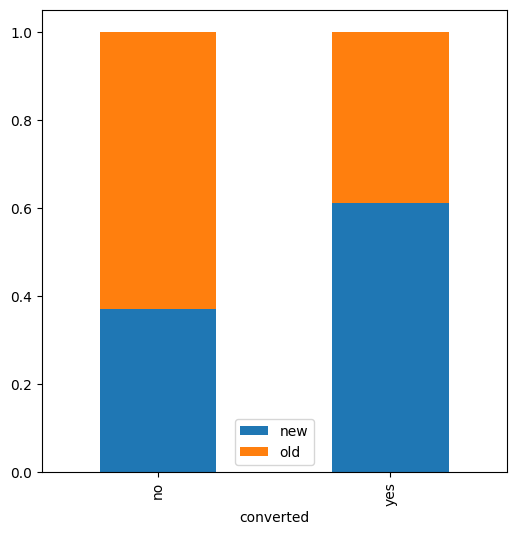

In [67]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,6),stacked=True)
plt.legend()
plt.show()

In [68]:
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

### **Defining the Null and Alternate Hypotheses**

$C_E$: conversion rate for existing/old landing page

$C_N$: conversion rate for new landing page

$H_0$: $C_N$ $=$ $C_E$

$H_a$: $C_N$ $>$ $C_E$

### **Selecting the Appropriate Test and Significance Level**

Because this is a one-tailed test with two population proportions from two independent populations, we use the **2-sample Z-test**.

The significance level will be $\alpha = 0.05$.

### **Collecting and Preparing Data**

In [69]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

converted_control = df.group.value_counts()['control']
converted_treatment = df.group.value_counts()['treatment']

In [70]:
print('The number of users served with the old pages is', (converted_control), 'while the number of users served with the new pages is', (converted_treatment))

The number of users served with the old pages is 50 while the number of users served with the new pages is 50


### **Calculating the P-Value**

In [71]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value_2 = proportions_ztest([new_converted, old_converted] , [converted_treatment, converted_control], alternative = 'larger')
print('The p-value is', p_value_2)

The p-value is 0.008026308204056278


### **Comparing P-Value with α**

In [72]:
if p_value_2 < 0.05:
    print(f'Since the p-value {p_value_2} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value_2} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### **Drawing Inference**


We have enough evidence to reject the null hypothesis, so we can infer that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## **3. Does the converted status depend on the preferred language?**

### **Visual Analysis**

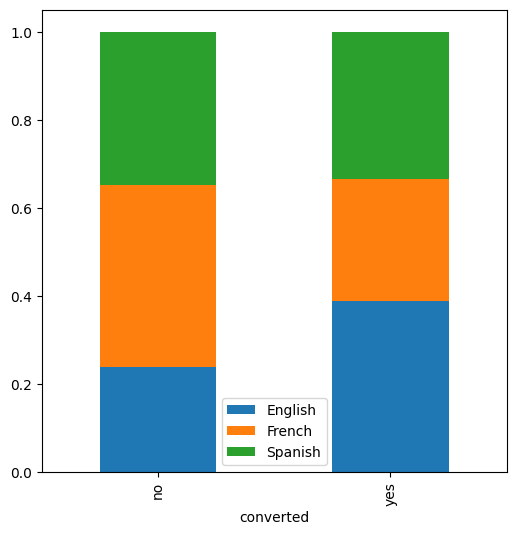

In [73]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,6),stacked=True)
plt.legend()
plt.show()

In [74]:
df.groupby(['language_preferred'])['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

### **Defining the Null and Alternate Hypotheses**


$H_0$: conversion status *does not depend* on preferred language

$H_a$: conversion status *depends* on preferred language

### **Selecting the Appropriate Test and Significance Level**

Because this involves two categorical variables and is a test of independence, we use the **Chi-Square test of independence**.

The significance level will be $\alpha = 0.05$.

### **Collecting and Preparing Data**

In [75]:
contingency_table_status = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table_status

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### **Calculating the P-Value**

In [76]:
from scipy.stats import chi2_contingency
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency_table_status)   # #complete the code by filling appropriate parameters in the blanks
print('The p-value is', p_value_3)

The p-value is 0.2129888748754345


### **Comparing P-Value with α**

In [77]:
if p_value_3 < 0.05:
    print(f'Since the p-value {p_value_3} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value_3} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### **Drawing Inference**


Because we do not have enough evidence to reject the null hypothesis, this means that the converted status does not depend on the languages preferred.

## **4. Is the time spent on the new page same for the different language users?**

### **Visual Analysis**

In [78]:
df_new = df[df['landing_page'] == 'new']

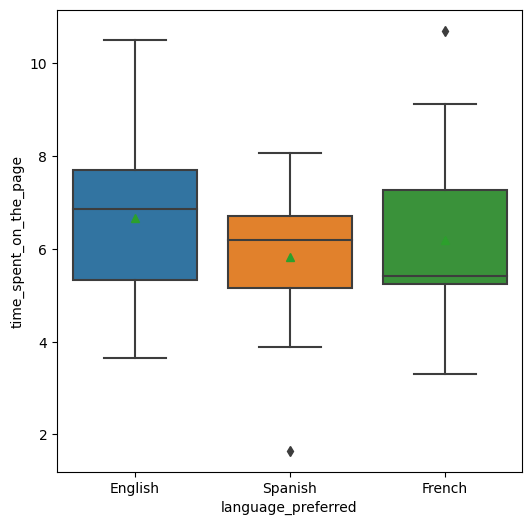

In [79]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='language_preferred', y ='time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [80]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [81]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,16.0,6.663750,1.984150,3.65,5.3275,6.865,7.7125,10.50
French,17.0,6.196471,1.933394,3.30,5.2500,5.420,7.2700,10.71
Spanish,17.0,5.835294,1.525656,1.65,5.1500,6.200,6.7000,8.08


### **Defining the Null and Alternate Hypotheses**

$T_G$: time spent on new landing page using English

$T_F$: time spent on new landing page using French

$T_S$: time spent on new landing page using Spanish

$H_0$: $T_G$ $=$ $T_F$ $=$ $T_S$

$H_a$: at least one equality is not true (or that the time spent on the new page is different between the languages)

### **Selecting the Appropriate Test and Significance Level**

Since we are comparing three different population means, we use the **one-way ANOVA test**.

The significance level will be $\alpha = 0.05$.

### **Collecting and Preparing Data**

In [82]:
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

In [83]:
time_spent_English.describe()

count    16.00000
mean      6.66375
std       1.98415
min       3.65000
25%       5.32750
50%       6.86500
75%       7.71250
max      10.50000
Name: time_spent_on_the_page, dtype: float64

In [84]:
time_spent_French.describe()

count    17.000000
mean      6.196471
std       1.933394
min       3.300000
25%       5.250000
50%       5.420000
75%       7.270000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [85]:
time_spent_Spanish.describe()

count    17.000000
mean      5.835294
std       1.525656
min       1.650000
25%       5.150000
50%       6.200000
75%       6.700000
max       8.080000
Name: time_spent_on_the_page, dtype: float64

### **Calculating the P-Value**

In [86]:
from scipy.stats import f_oneway
test_stat, p_value_4 = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value_4)

The p-value is 0.43204138694325955


### **Comparing P-Value with α**

In [87]:
if p_value_4 < 0.05:
    print(f'Since the p-value {p_value_4} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value_4} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### **Drawing Inference**


As there is not enough evidence to reject the null hypothesis, we can conclude that there is not any significant difference between the average time spent on the new landing pages for all 3 languages.

## **Conclusions and Buisness Recommendations**

**Conclusion:** The analysis shows that the new landing page is indeed an improvement over the existing one, given that on average, more users spend more time on the new than the old and there are more people who switch from old to new than vice-versa. It should also be noted that language preferences do not influence the amount of time that users spend on the pages.

**Recommendation:** As such, the company should just stick to their current plan, which is to update its page to the new version while keeping the language options as they are, in order to drive in more revenue. Furthermore, the company could add in more language options so that more people can access the news page.

